# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

**Action Plan**
Through the course of this project I will be conducting EDA on data collected from vehicles advertisements to assess what factors most impact the price the vehicle. My project will begin with the neccessary data preprocessing to deal with data irregularities like missing values, incorrect datatypes, etc. From there I will use graphs to analyze the ways that different aspects of vehicles impact the cars sale price.

**Hypotheses**
The biggest impacts on a car's sale price is the model year, condition of the car, and its milage.  

A car's transmission type and whether is is 4wd or not will also have an impact but both of these factors are more niche and will thus not be as impactful to overall trends. 

## Initialization

To complete this project I will need both the Pandas library as well as MatPlotLib to most effectivly utilize a variety of graphs in my EDA.  

In [ ]:
# Loading all the libraries
import pandas as pd
# importing the library using the standard name plt
import matplotlib.pyplot as plt 



### Load data

The first step is of course to the load the CSV file in question and ensure that it is properly formatted (values are in fact seperated by commas and not spaces or some other value). From there I'll assess any missing data or incorrect data types. 

In [ ]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [ ]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


**First Glance:**

`model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` are all missing values

`date_posted` is an object when it should be in datetime

`condition` will need to be convered to a number 0 through 5 scale (0 being salvage and 5 being new)

In [ ]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [ ]:
len(data[data['paint_color'].isnull()])/len(data['paint_color'])*100

17.985443959243085

[Are there missing values across all columns or just a few? What columns contain the most missing values? Briefly describe what you see in 1-2 sentences.]

`model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` all have missing values. I expect the most impactful of these in my analysis will be `model_year` and `odometer` as these cannot be filled with by using context clues. 

`paint_color` is unlikely to signifcatly impact the sale price of a car and can likely be filled with 'unknown'. Given that the missing values are only 17% of the data this should be fine. 

The exisiting values for `is_4wd` appear to be a numeric scale that was only half filled, likely due to a data entry error. The missing values can be filled with '0' to indicate the car is not 4wd capable. 

In [ ]:
len(data[data['model_year'].isnull()])/len(data['model_year'])*100

7.023774866569626

In [ ]:
len(data[data['cylinders'].isnull()])/len(data['cylinders'])*100

10.208636584182436

In [ ]:
len(data[data['odometer'].isnull()])/len(data['odometer'])*100

15.316836487142163

### Conclusions and further steps

Looking at the percentages of missing values in the affected columns I can tell that removing the missing values in `model_year` will be most useful for my data analysis. Given that only 7% of the values are Null removing them will have a negligable effect on the data. 

Null values in `Cylinders` can be filled with 'unknown'. Given that the null values are only 10% of the total data they could also be removed but the number of cylinders is unlikely to impact a car's sale price as much as the model year or odometer. 

`Odometer` requires further analysis. The missing values are 15% of the total data which is higher than ideal for removing those rows. What I feel will be most usefull will be to fill the Null valus with the milage averages from the car's applicable year.

I will also need to update `condition` to a numerical scale. 


In [ ]:
mean_mileage = data.pivot_table(index = ['model_year', 'cylinders'], values = 'odometer')
print(mean_mileage)

                           odometer
model_year cylinders               
1908.0     8.0        169328.000000
1936.0     6.0         30000.000000
1948.0     8.0          4000.000000
1955.0     6.0         47180.000000
1958.0     8.0         32991.500000
...                             ...
2018.0     10.0        21685.060606
2019.0     4.0         15538.208955
           6.0         19285.606061
           8.0         16045.500000
           10.0        10841.000000

[204 rows x 1 columns]


In [ ]:
median_mileage = data.pivot_table(index = 'model_year', values = 'odometer', aggfunc = 'median')
print(median_mileage)

            odometer
model_year          
1908.0      169328.0
1936.0       30000.0
1948.0        4000.0
1949.0        1800.0
1954.0        3565.0
...              ...
2015.0       78514.0
2016.0       54000.0
2017.0       41000.0
2018.0       20627.0
2019.0       14151.5

[67 rows x 1 columns]


I will fill the Null values in `odometer` with the median values to ensure I am avoiding any hidden outliers. It is always possible that there are cars on the market with unusually high or low milage regardless of year. 

## Treat missing values (if any)

In [ ]:
data['paint_color'] = data['paint_color'].fillna('unknown')

In [ ]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [ ]:
def avg_cylinders(row):
    
    cylinders = row['cylinders']
    model = row['model']
    age = row['model_year']
    try:
        avg_cylinders = data[(data['model_year'] == age) & (data['model'] == model) & ~(data['cylinders'].isna())]['cylinders'].mean()
        return avg_cylinders
    except:
        return

In [ ]:
data.loc[data['cylinders'].isna(), 'cylinders'] = data[data['cylinders'].isna()].apply(avg_cylinders, axis = 1)


In [ ]:
data[data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
418,4998,NaN,toyota corolla,good,NaN,gas,44442.0,automatic,sedan,grey,0.0,2019-04-19,12
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,0.0,2018-06-27,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643,21499,NaN,ram 2500,good,NaN,diesel,165831.0,manual,truck,red,1.0,2018-08-14,91
50836,39488,NaN,ford f350,like new,NaN,gas,32000.0,automatic,truck,unknown,1.0,2018-06-23,6
50924,1999,NaN,jeep grand cherokee laredo,good,NaN,gas,199312.0,automatic,SUV,blue,1.0,2019-01-05,69
51125,20900,NaN,ford f-150,excellent,NaN,gas,53209.0,automatic,pickup,unknown,1.0,2018-08-04,87


In [ ]:
data = data.dropna(subset = ['cylinders'])

In [ ]:
data.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [ ]:
def avg_model_year(row):
    
    model = row['model']
    try:
        avg_model_year = data[(data['model'] == model) & ~(data['model_year'].isna())]['model_year'].median()
        return avg_model_year
    except:
        return

In [ ]:
data.loc[data['model_year'].isna(), 'model_year'] = data[data['model_year'].isna()].apply(avg_model_year, axis = 1)


In [ ]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51136 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51136 non-null  int64  
 1   model_year    51136 non-null  float64
 2   model         51136 non-null  object 
 3   condition     51136 non-null  object 
 4   cylinders     51136 non-null  float64
 5   fuel          51136 non-null  object 
 6   odometer      43310 non-null  float64
 7   transmission  51136 non-null  object 
 8   type          51136 non-null  object 
 9   paint_color   51136 non-null  object 
 10  is_4wd        51136 non-null  float64
 11  date_posted   51136 non-null  object 
 12  days_listed   51136 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [ ]:
len(data[data['odometer'].isnull()])/len(data['odometer'])*100

15.304286608260325

In [ ]:
def median_mileage(row):
    
    age = row['model_year']
    model = row['model']
    condition = row['condition']
    kind = row['type']
    try:
        median_value = data[(data['model_year'] == age) & (data['model'] == model) & (data['condition'] == condition) & (data['type'] == kind) & ~(data['odometer'].isna())]['odometer'].median()
        return median_value
    except:
        return
        

In [ ]:
data.loc[data['odometer'].isna(), 'odometer'] = data[data['odometer'].isna()].apply(median_mileage, axis = 1)


In [ ]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24,3950,2009.0,chrysler 200,excellent,4.000000,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.000000,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
119,14800,2016.0,kia sorento,like new,4.352941,gas,NaN,automatic,SUV,brown,0.0,2019-02-27,93
310,32000,2016.0,gmc yukon,good,8.000000,gas,NaN,automatic,SUV,black,1.0,2019-03-19,37
462,4290,2005.0,subaru outback,good,4.000000,gas,NaN,automatic,hatchback,silver,1.0,2018-12-18,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51324,18995,2018.0,dodge grand caravan,new,6.000000,gas,NaN,automatic,mini-van,grey,0.0,2018-06-20,60
51347,5999,2008.0,nissan rogue,excellent,4.000000,gas,NaN,automatic,wagon,custom,1.0,2018-12-27,39
51406,7495,2010.0,chevrolet equinox,good,4.545455,gas,NaN,automatic,wagon,black,0.0,2019-04-19,34
51472,3900,2003.0,chrysler town & country,excellent,6.000000,gas,NaN,automatic,van,silver,0.0,2019-01-16,64


In [ ]:
data = data.dropna(subset = ['odometer'])

In [ ]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,233000.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50539 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50539 non-null  int64  
 1   model_year    50539 non-null  float64
 2   model         50539 non-null  object 
 3   condition     50539 non-null  object 
 4   cylinders     50539 non-null  float64
 5   fuel          50539 non-null  object 
 6   odometer      50539 non-null  float64
 7   transmission  50539 non-null  object 
 8   type          50539 non-null  object 
 9   paint_color   50539 non-null  object 
 10  is_4wd        50539 non-null  float64
 11  date_posted   50539 non-null  object 
 12  days_listed   50539 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


I have no dealt with the various null values in the dataframe in the following ways:

- `paint_color`: filled the null values with 'unknown' as there is no way to fill those values with the available data
- `odometer`: used a function to fill the null values with the median mileage found based off the `model`, `model_year`, `condition` and `type` columns. I dropped the remaining 307 rows the function couldn't fill.
- `cylinders`: used a function to fill the null values based average cylinders from `model` and `model_year` columns. I dropped the remaining 386 rows the function couldn't fill. 
- `model_year`: used a function to fill the null values with the average age based `model` column. 

## Fix data types

In [ ]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

`date_posted` was the only column with an incorrect data type and this is easily fixed with `pd.to_datetime`

In [ ]:
data['cylinders'] = data['cylinders'].astype(int)

In [ ]:
data['model_year'] = data['model_year'].astype(int)

In [ ]:
data['is_4wd'] = data['is_4wd'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50539 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50539 non-null  int64         
 1   model_year    50539 non-null  int64         
 2   model         50539 non-null  object        
 3   condition     50539 non-null  object        
 4   cylinders     50539 non-null  int64         
 5   fuel          50539 non-null  object        
 6   odometer      50539 non-null  float64       
 7   transmission  50539 non-null  object        
 8   type          50539 non-null  object        
 9   paint_color   50539 non-null  object        
 10  is_4wd        50539 non-null  int64         
 11  date_posted   50539 non-null  datetime64[ns]
 12  days_listed   50539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.4+ MB


Now that I have filled or removed Null values as applicable and fixed the incorrect data type for `date_posted`, `is_4wd`, `cylinders`, and `model_year` I can move forward into enriching my data and beginning my analysis. 

## Enrich data

To make my later analysis easier and cleaner I will add several columns; `month_posted`, `vehicle_age`, and `mileage_per_year`. I will also convert the `condition` column to a numerical scale for ease of analysis. 

In [ ]:
# Add a month_posted column to make analysis easier

data['month_posted'] = data['date_posted'].dt.month

In [ ]:
# Add the vehicle's age when the ad was placed
year_posted = data['date_posted'].dt.year

data['vehicle_age'] = year_posted - data['model_year'] +1

In [ ]:
# Add the vehicle's average mileage per year

data['mileage_per_year'] = data['odometer']/data['vehicle_age']

In [ ]:
# It might help to replace the condition values with something that can be manipulated more easily

def condition_scale(condition):
    if condition == 'salvage':
        return 0
    if condition == 'fair':
        return 1
    if condition == 'good':
        return 2
    if condition == 'excellent':
        return 3
    if condition == 'like new':
        return 4
    if condition == 'new':
        return 5


In [ ]:
data['condition_rating'] = data['condition'].apply(condition_scale)

In [ ]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,vehicle_age,mileage_per_year,condition_rating
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,6,8,18125.000000,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,10,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9,3,17,13705.882353,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,4,3,26967.666667,3


## Check clean data

Now that I have finished all the data preprocessing I am ready to get in to the meat of my analysis. There are no more Null values and the new columns I need to streamline my analysis have been added.

In [ ]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50539 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             50539 non-null  int64         
 1   model_year        50539 non-null  int64         
 2   model             50539 non-null  object        
 3   condition         50539 non-null  object        
 4   cylinders         50539 non-null  int64         
 5   fuel              50539 non-null  object        
 6   odometer          50539 non-null  float64       
 7   transmission      50539 non-null  object        
 8   type              50539 non-null  object        
 9   paint_color       50539 non-null  object        
 10  is_4wd            50539 non-null  int64         
 11  date_posted       50539 non-null  datetime64[ns]
 12  days_listed       50539 non-null  int64         
 13  month_posted      50539 non-null  int64         
 14  vehicle_age       5053

In [ ]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,vehicle_age,mileage_per_year,condition_rating
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,6,8,18125.000000,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,10,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9,3,17,13705.882353,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,4,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,6,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,12,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,1,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,7,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2,12,12265.916667,3


## Study core parameters

Given that my initial hypotheses were that the biggest factors in the sale price of a car were age, condition and milage I will use those three factors as the crux of my analysis. To locate outliers I will first utilize boxplots and then move to histograms or bar graphsas necessary. I may also use a scatter matrix is applicable. 

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

<AxesSubplot:>

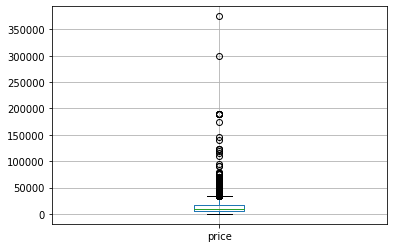

In [ ]:
data.boxplot('price')

This rough boxplot of price shows me that there are a great deal of high-cost outliers but no low cost outliers. I will need to identify why these outliers are occuring and decide how to deal with them. 

<AxesSubplot:ylabel='Frequency'>

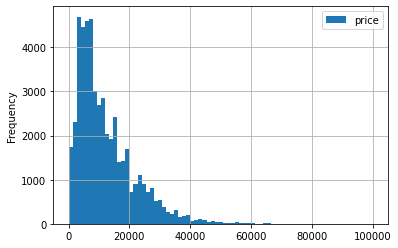

In [ ]:
#lets start with a histogram of price v age as a test

data.plot(x = 'vehicle_age', y = 'price', kind = 'hist', bins = 75, grid = True, range = (0, 100000))


In [ ]:
free_cars = data.query('price <= 100')
free_cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,vehicle_age,mileage_per_year,condition_rating
405,1,2014,chevrolet camaro,excellent,6,gas,71310.0,automatic,coupe,unknown,0,2018-07-14,29,7,5,14262.000000,3
3063,1,1998,chevrolet silverado,good,8,gas,164000.0,automatic,pickup,unknown,1,2018-10-11,49,10,21,7809.523810,2
3808,1,2007,chevrolet tahoe,good,8,gas,200.0,automatic,SUV,red,0,2019-03-18,63,3,13,15.384615,2
3902,1,1996,ford f-150,fair,7,gas,163000.0,manual,truck,white,0,2019-02-23,54,2,24,6791.666667,1
4140,1,2004,chevrolet silverado,excellent,8,diesel,83000.0,automatic,pickup,unknown,1,2019-02-04,14,2,16,5187.500000,3
4737,69,2016,honda odyssey,excellent,6,gas,70988.0,automatic,van,grey,0,2019-01-10,31,1,4,17747.000000,3
4738,69,2018,hyundai elantra,excellent,4,gas,28089.0,automatic,sedan,silver,0,2018-12-16,16,12,1,28089.000000,3
4739,69,2016,ford explorer,excellent,6,gas,70269.0,automatic,SUV,silver,1,2018-08-06,20,8,3,23423.000000,3
4771,69,2018,ford escape,excellent,4,gas,70057.0,automatic,SUV,white,1,2018-05-29,12,5,1,70057.000000,3
4772,69,2018,ford fusion,excellent,4,gas,52187.0,automatic,sedan,white,0,2018-05-22,30,5,1,52187.000000,3


In [ ]:
free_cars['condition'].value_counts()

excellent    778
like new      30
good          30
fair          10
new            3
Name: condition, dtype: int64

In [ ]:
free_cars['vehicle_age'].value_counts()

1     272
2     121
3     107
4     101
5      72
6      37
7      28
8      17
12     15
13     14
10     14
11     12
9       8
16      6
14      4
20      4
15      3
18      3
19      3
21      3
24      2
42      2
17      1
23      1
54      1
Name: vehicle_age, dtype: int64

We can immediatly see there is a generally negative correlation between price and age: for the most part the older the car the cheaper it is. Strangely however there is a large spice of cars at and around '0' on the price axis. Upon further investigation these cars are predominantly newer and higher quality, implying this is a error in data entry. 

<AxesSubplot:ylabel='Frequency'>

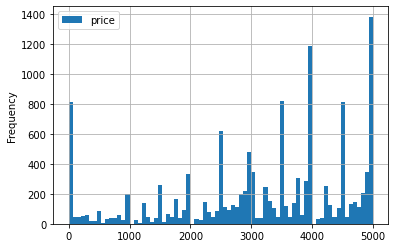

In [ ]:
data.plot(x = 'vehicle_age', y = 'price', kind = 'hist', bins = 75, grid = True, range = (0, 5_000))

Zooming in around '0' in `price` on the x axis shows that there is a big spike at zero and it gradually increases from there. For the sake of this analysis I will remove all values in price below 1000. 

Text(0.5, 0, 'Price')

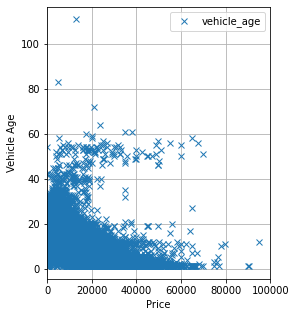

In [ ]:
# trying out a point graph to see distribution
data.plot(x='price', y='vehicle_age', style='x', xlim=(0, 100000), figsize = (4, 5), grid=True)
plt.ylabel('Vehicle Age')
plt.xlabel('Price')



<AxesSubplot:xlabel='vehicle_age', ylabel='price'>

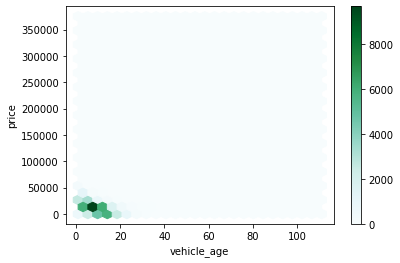

In [ ]:
# doing the same graph as a hexbin
data.plot(x='vehicle_age', y='price', kind='hexbin', gridsize=25, sharex=False)


The last two graphs show me that price and age are concentrated towards newer and lower cost points on the x and y axises but from the first graph we can see there are outliers in both `price` and `vehicle_age`.

<AxesSubplot:xlabel='vehicle_age'>

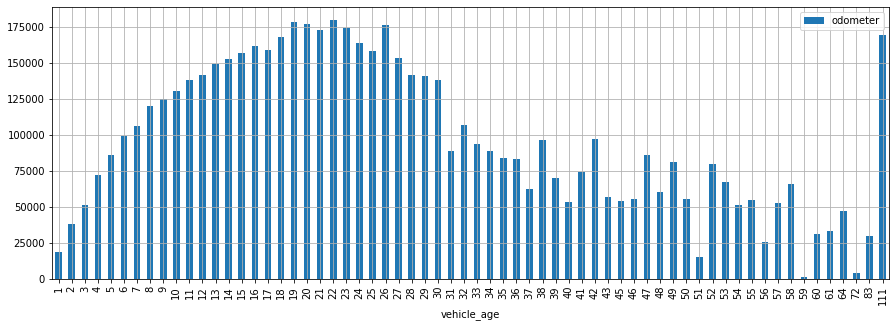

In [ ]:
# lets look at the relationship between average mileage and vehicle age 
# using median as I filled Null values with median values

avg_mileage = data.pivot_table(index = 'vehicle_age', values = 'odometer', aggfunc = 'median')
avg_mileage.plot(kind = 'bar', figsize = (15,5), grid = True)


<AxesSubplot:>

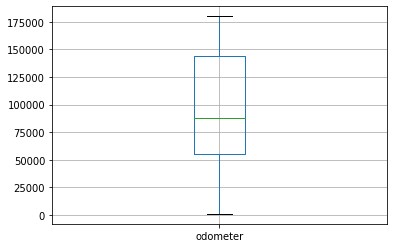

In [ ]:
avg_mileage.boxplot()

This shows us some interesting information: as we might expect the average mileage rises as cars get older until it hits 16 years, then it fluctates a litte before trending back down. 

We can assume from this that for very old cars only those with low mileage have remained in good enough condition to continue to be viable for sale. Looking at the bar chart there is a dramatic outlier both for age and mileage; 110 years at around 170K miles. But when examined in a boxplot we see no outliers, indicating that value is fine to leave in the dataset. 

<AxesSubplot:xlabel='condition_rating'>

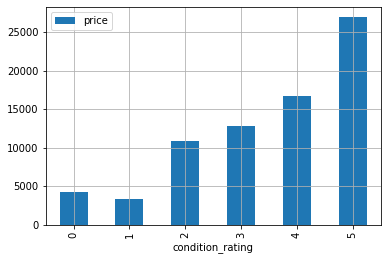

In [ ]:
# lets compare condition to price
vehicle_condition = data.pivot_table(index = 'condition_rating', values = 'price')
vehicle_condition.plot(kind = 'bar', grid = True)


This gives us a very clear positive correlation between the condition of the car and its sale price. Interestingly cars rated for 'salvage' appear to cost a little more than cars listed as 'fair' but this could be a reporting quirk where the quality line between 'salvage' and 'fair' is indistinct enough that some there is overlap.  

<AxesSubplot:xlabel='cylinders'>

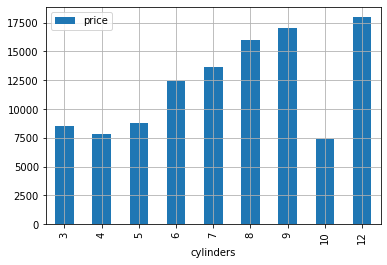

In [ ]:
# Lets do a final check of price v cylinders 

cylinder_num = data.pivot_table(index = 'cylinders', values = 'price')
cylinder_num.plot(kind = 'bar', grid = True)


This will require a bit more diving to establish what kind of cars are represented by their cylinder numbers. Presumably a 12 cylinder vehicle is not an everyday sedan but some kind of industrial vehicle, explaining the high cost. 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

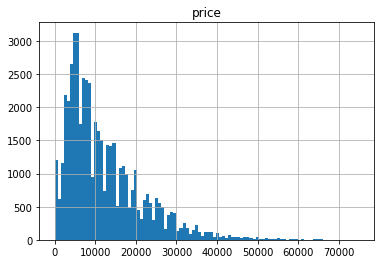

In [ ]:
data.hist('price', bins = 100, range = (0,75_000))

This histogram shows us that the majority of the cars available on the site are between 5k and 20k but there are cars available as expnesive as 65K. Strangely, there is also a peak at 0 which will need to be removed. 

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

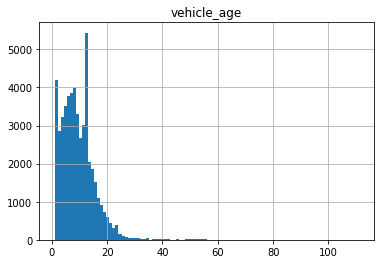

In [ ]:
data.hist('vehicle_age', bins = 100)

This histogram shows us that the majority of the cars availabe are between 0 and 17years old, with peaks at 0 and around 17years. Outliers are greater than 30 years.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

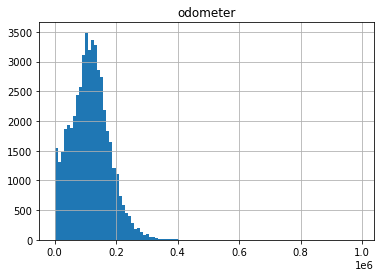

In [ ]:
data.hist('odometer', bins = 100)

This histogram shows a slight peak at 0 then rises steadily before dropping, no notable outliers.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

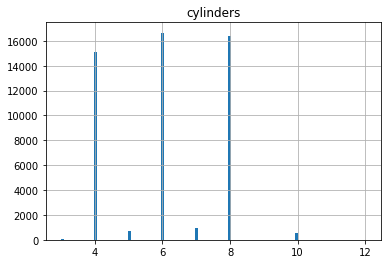

In [ ]:
data.hist('cylinders', bins = 100)

This histogram shows the majority of vehicles listed have 4, 6, or 8 cylinders with very few having 3, 5, 7, 10, or 12

array([[<AxesSubplot:title={'center':'condition_rating'}>]], dtype=object)

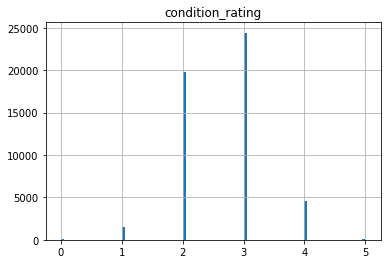

In [ ]:
data.hist('condition_rating', bins = 100)

This histogram shows that the majority of the vehicles listed are between 'good' and 'like new'.

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [ ]:
# Determine the lower limits for outliers
print(data.query('price < 0'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, month_posted, vehicle_age, mileage_per_year, condition_rating]
Index: []


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

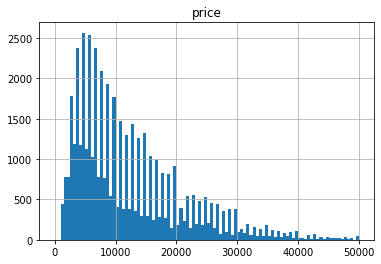

In [ ]:
# Determine the upper limits for outliers
price_range = data.query('1_000 <= price <= 50_000')
price_range.hist('price', bins = 100, range = (0,50_000))

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

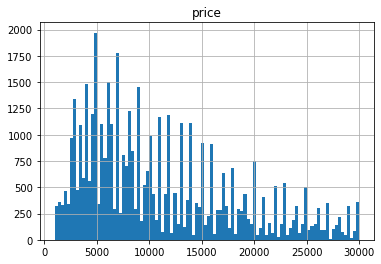

In [ ]:
price_range.query('price <= 30_000').hist('price', bins = 100)
                                        

In [ ]:
price_range = price_range.query('1_000 <= price <= 30_000')

I've now isolated the price ranges that are free of outliers, now it's time remove the 'outliers' in `vehicle_age`

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

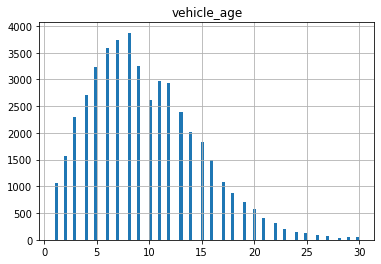

In [ ]:
data_true = price_range.query('0 <= vehicle_age <= 30')
data_true.hist('vehicle_age', bins = 100)

In [ ]:
# Final check of data without outliers in the new DataFrame 'data_true'

data_true.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,vehicle_age,mileage_per_year,condition_rating
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,6,8,18125.000000,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,10,8,11088.125000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9,3,17,13705.882353,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,4,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,6,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,12,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,1,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,7,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2,12,12265.916667,3


In [ ]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46320 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             46320 non-null  int64         
 1   model_year        46320 non-null  int64         
 2   model             46320 non-null  object        
 3   condition         46320 non-null  object        
 4   cylinders         46320 non-null  int64         
 5   fuel              46320 non-null  object        
 6   odometer          46320 non-null  float64       
 7   transmission      46320 non-null  object        
 8   type              46320 non-null  object        
 9   paint_color       46320 non-null  object        
 10  is_4wd            46320 non-null  int64         
 11  date_posted       46320 non-null  datetime64[ns]
 12  days_listed       46320 non-null  int64         
 13  month_posted      46320 non-null  int64         
 14  vehicle_age       4632

In [ ]:
print(len(data_true)/len(data)*100)

91.65199153129267


Comparing the new outlier-free data frame (`data_true`) to the original data frame (`data`) we have a dataframe 96% as long as the original. Only 4% was removed between irregular data and outliers. Pretty good!

## Study core parameters without outliers

Text(0.5, 0, 'Vehicle Age')

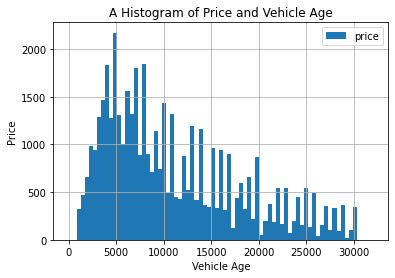

In [ ]:
data_true.plot(x = 'vehicle_age', y = 'price', kind = 'hist', bins = 75, grid = True, range = (0, 32_000))
plt.title('A Histogram of Price and Vehicle Age')
plt.ylabel('Price')
plt.xlabel('Vehicle Age')

Text(0.5, 0, 'Vehicle Age')

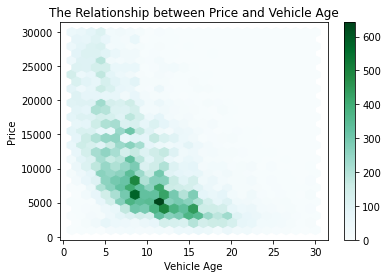

In [ ]:
data_true.plot(x='vehicle_age', y='price', kind='hexbin', gridsize=25, sharex=False)
plt.title('The Relationship between Price and Vehicle Age')
plt.ylabel('Price')
plt.xlabel('Vehicle Age')

In [ ]:
print(data_true['price'].corr(data_true['vehicle_age']))

-0.5470184519068209


Text(0.5, 0, 'Vehicle Age')

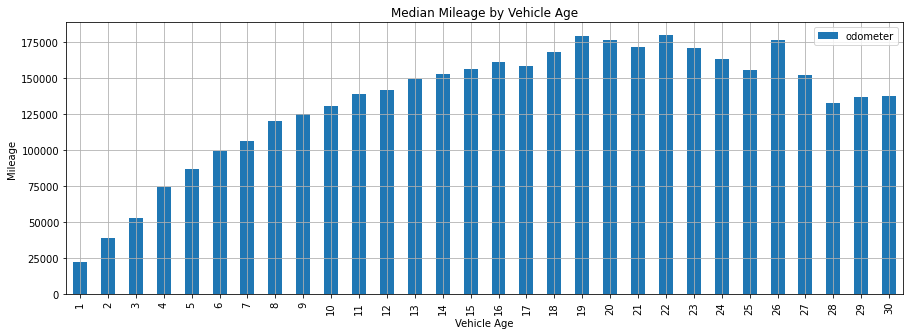

In [ ]:
avg_mileage_true = data_true.pivot_table(index = 'vehicle_age', values = 'odometer', aggfunc = 'median')
avg_mileage_true.plot(kind = 'bar', figsize = (15,5), grid = True)
plt.title('Median Mileage by Vehicle Age')
plt.ylabel('Mileage')
plt.xlabel('Vehicle Age')

Text(0.5, 0, 'Cylinders')

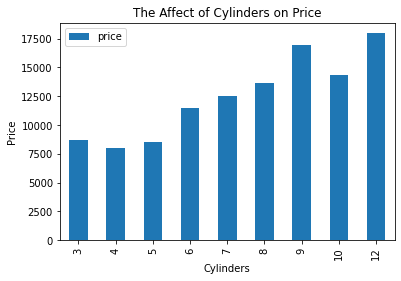

In [ ]:
cylinder_num_true = data_true.pivot_table(index = 'cylinders', values = 'price')
cylinder_num_true.plot(kind = 'bar')
plt.title('The Affect of Cylinders on Price')
plt.ylabel('Price')
plt.xlabel('Cylinders')

**Conclusion**

Now that I have removed the outliers from the data frame (creating `data_true`) I'm able to better look at the realtionships revealed by the graphs. The graph that is most helpful is the hexbin showing the relationship between `vehicle_age` and `price`. The hexbin very clearly shows us that the vast majority of cars being sold through website are concentrated between 5 and 15 years and between 5 and 15K. The negative correlation (-0.5651538) shows that the older the car the lower the price. 

Removing the outliers from `price` and `vehicle_age` makes the first histogram look far more logical, showing us the majority of cars available on the website are between 3K and 10K. 

## Ads lifetime

<AxesSubplot:>

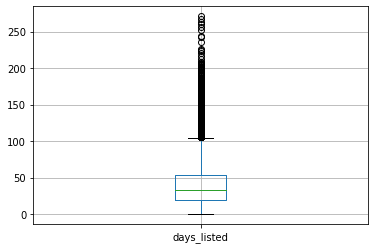

In [ ]:
data_true.boxplot('days_listed')

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

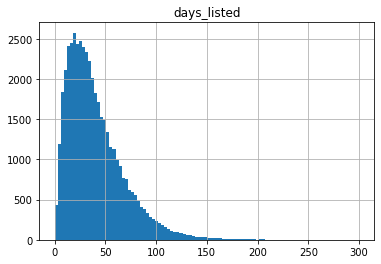

In [ ]:
data_true.hist('days_listed', bins = 100, range = (0,300))

**Conclusion**

When we look at the lifespan of ads on the site we see can immediately see that generally ads last between 25 and 52 days though the normal range is between 0 and just over 100 days. Outliers exist between 100 and 275. If we wished to remove outliers from the dataframe anything over 110 days could be safely removed. 

## Average price per each type of vehicle

<AxesSubplot:xlabel='type'>

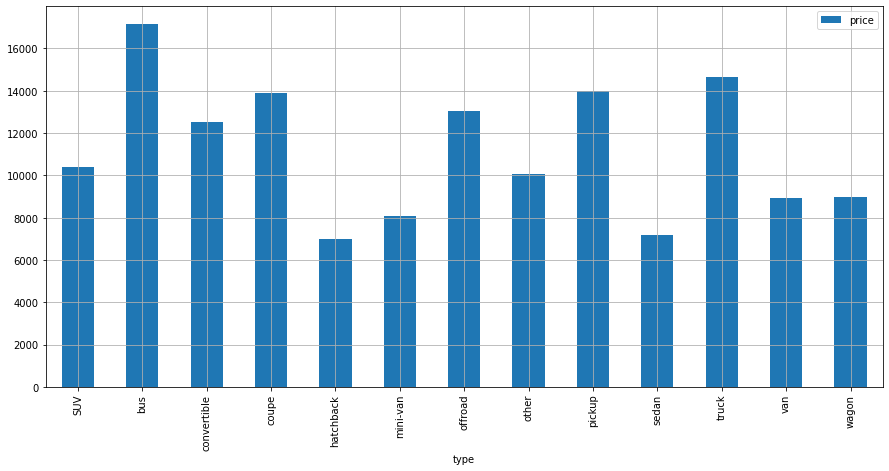

In [ ]:
model_type_avg = data_true.pivot_table(index = 'type', values = 'price')
model_type_avg.plot(kind = 'bar', figsize = (15,7), grid = True)

In [ ]:
model_type_count = data_true['type'].value_counts()
print(model_type_count)

sedan          11546
SUV            11360
truck          10567
pickup          6075
coupe           1926
wagon           1451
mini-van        1124
hatchback        967
van              531
convertible      351
other            214
offroad          184
bus               24
Name: type, dtype: int64


Using a simple `value_counts()` call on `data_true` we see that the two vehicle types with the most ads are sedans and SUVs and when examining the vehicle prices compared to types we see that two most expensive vehicle types are buses and trucks, wich is reiforced by the graph we say earlier showing vehicles with 12 cylinders were the most expensive on the website. 

The two most popular cars on the site are **sedans** and **SUVs**

### Price factors

Now that I have conducted my data preproccessing and the majority of my EDA it is time for the final price analysis of the data frame. Here I will examine the following using the two most popular types of cars - Sedans and SUVs:

Mileage & Price 
<br>
Paint Color & Price
<br>
Condition & Price
<br>
Transmission Type & Price

[Make use of correlation matrix and correlation plots]

In [ ]:
# removing 'bus' from type as it has under 50 ads in the datframe
top_cars = data_true.query('type == "sedan" or type == "SUV"')

<AxesSubplot:xlabel='odometer', ylabel='price'>

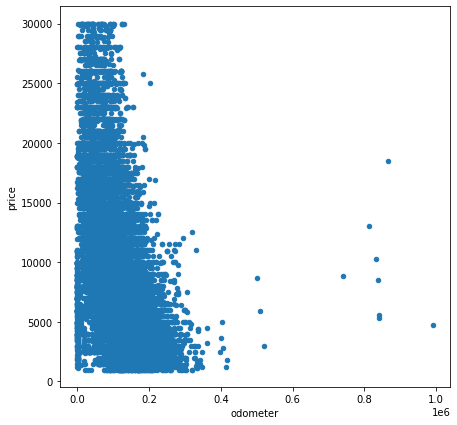

In [ ]:
top_cars.plot(x = 'odometer', y = 'price', kind = 'scatter', figsize = (7,7))

<AxesSubplot:xlabel='odometer', ylabel='price'>

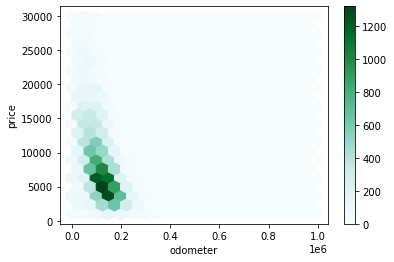

In [ ]:
# examining the relationship between mileage and price
top_cars.plot(x='odometer', y='price', kind='hexbin', gridsize=20, sharex=False)

In [ ]:
# checking the correlation between mileage and price
print(top_cars['price'].corr(data['odometer']))

-0.5076168733903466


**Analysis**

Mileage + Price: Looking at this hexbin we see an extremely clear negative realtionship between mileage and price, reinforced by the shown correlation coefficient of -0.5080435322977886. This tells us concretely that the more mileage a car has the lower the sale price. 

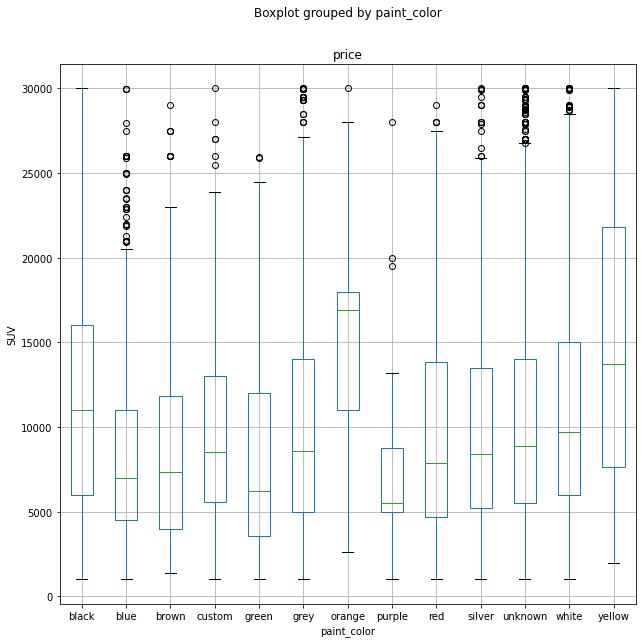

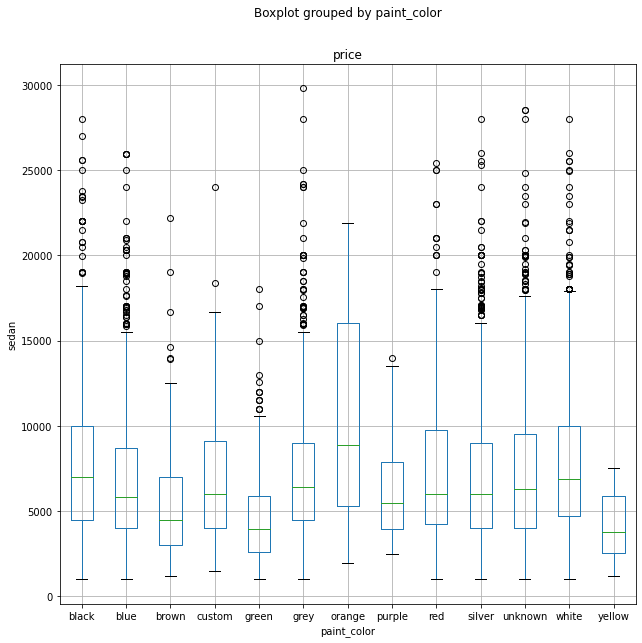

In [ ]:
# checking for the realtionship between price, car type, and color
for cartype, cardata in top_cars.groupby('type'):
    cardata.boxplot(column = 'price', by = 'paint_color', figsize = (10,10))
    plt.ylabel(cartype)

**Analysis**

Paint Color + Price: These boxplots show us that paint color is has more weight on SUVs than sedans when considering pricing. While for both black is one of the most popular colors SUVs have a significant showing of yellow cars while sedans are more popular in orange. 

<AxesSubplot:xlabel='condition', ylabel='price'>

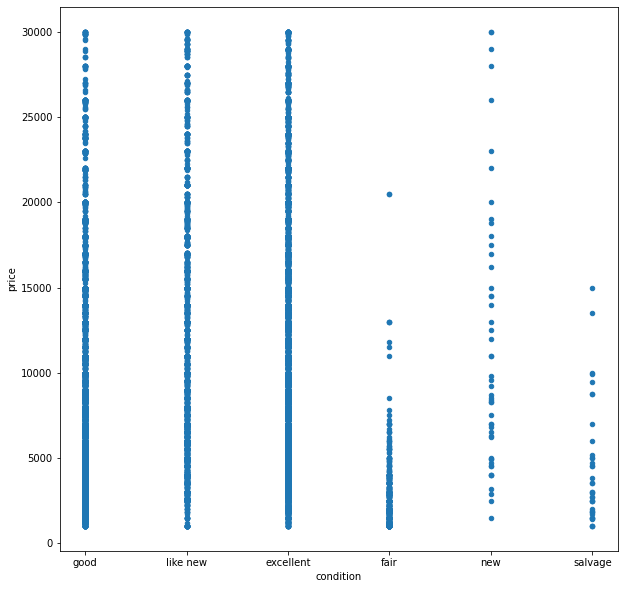

In [ ]:
top_cars.plot(x='condition', y='price', kind='scatter', figsize = (10,10))

<AxesSubplot:xlabel='transmission', ylabel='price'>

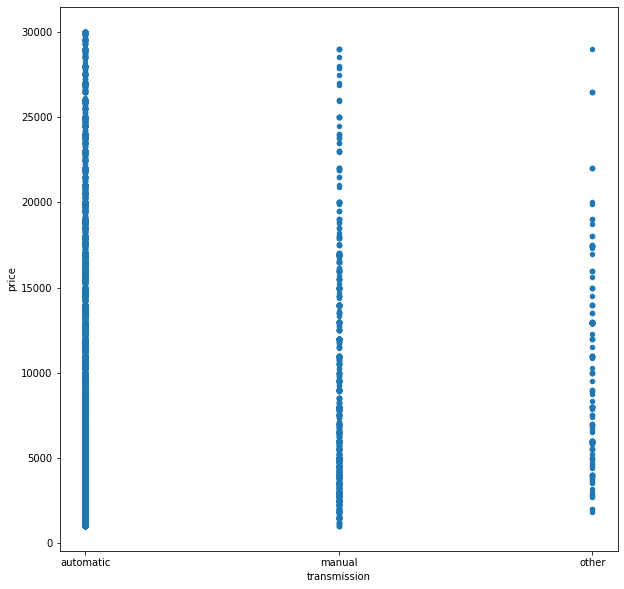

In [ ]:
top_cars.plot(x='transmission', y='price', kind='scatter', figsize = (10,10))

**Analysis** 

Condition + Price: As I expected vehicle condition is a major factor in the cars price, cars rated 'good' to 'like new' ('excellent' has the greatest number of listings) are signifcantly more expensive than those 'fair' and 'salvage'. Interestingly 'new' appears to be a slight exeption to this but given the nature of the website being primarily a resale site there is likely a dearth of actually new cars represented in the dataset.   

Transmission + Price: Transmission clearly has an effect on price but that is more of a factor of availability than nature. The vast majority of cars are now automatic transmission giving them dominance in the market at all price points. Manual transmissions do appear at every price point, showing that there are luxury vehicles with manual transmission though they are less common. 

## General conclusion

We have now reached our conclusion, the moment of truth at the end of my data analysis journey. Below I have printed the full correlation coefficient for the entire final data set (`model_type`) to help guide my conclusions.

**The Journey** 

To reach the conclusion of this data journey I had to deal with a collection of data irregularities. Primary among them were Null values in `is_4wd`, `odometer`, `model_year`, `paint_color` and `cylinders`. `is_4wd` was an easy fix as it was a binary collumn the Null values should of been '0'. `Odometer` required filling the null values with the median mileage for vehicles by model year, type, condition, and model. I filled the null values in rows of `model_year` with the average year based on model and filled the null values in `cylinders` with avergage values based on model and age. I removed the roughly 700 rows that were unable to be filled with available data. For `paint_color` I filled the null values with 'unknown' as there were too many to remove and not lose the other useful information contained in those rows. 

**What Impacted Price?**

We can tell from the work I have done that the factors with the greatest impacts on price are age, condition, and mileage. These factors are of course also intertwined, an older car with more mileage is generally in worse condition and cheap while a new car with lower mileage and in better condition is more expensive. 

There are exception to this rule, business vehicles like buses and trucks tend to be more expensive regardless of quality but they are not representitive of the overall data set. 

Factors like 4wd and transmission types aren't deciding factors in price but are impacted by vehicle type.  